In [1]:
import h2o
from sklearn.preprocessing import LabelEncoder
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.431-b10, mixed mode)
  Starting server from c:\Users\anzel\anaconda3\envs\py36\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\anzel\AppData\Local\Temp\tmpv8hi6m82
  JVM stdout: C:\Users\anzel\AppData\Local\Temp\tmpv8hi6m82\h2o_anzel_started_from_python.out
  JVM stderr: C:\Users\anzel\AppData\Local\Temp\tmpv8hi6m82\h2o_anzel_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,16 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 16 days
H2O_cluster_name:,H2O_from_python_anzel_c82r9y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.087 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [2]:
#df = pd.read_csv("data/mushrooms.csv")
df = h2o.import_file("data/mushrooms.csv", header =1)

#labelEncoder = LabelEncoder()
#for column in df.columns:
#    df[column] = labelEncoder.fit_transform(df[column])
#df = h2o.H2OFrame(df)
#df = df.asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
# Разделяем данные на Train/Test/Validation. Train размером 70%, test и validation по 15% 
train_df, test_df = df.split_frame(ratios=[.7])

In [4]:
y = "class"
train_columns = train_df.columns
train_columns.remove(y)

aml_model = H2OAutoML(max_runtime_secs=500, seed = 1)
aml_model.train(x = train_columns, y = y, training_frame = train_df)

AutoML progress: |
11:00:25.438: AutoML: XGBoost is not available; skipping it.
11:00:25.580: _train param, Dropping bad and constant columns: [veil-type]

███
11:00:29.538: _train param, Dropping bad and constant columns: [veil-type]

███
11:01:04.994: _train param, Dropping unused columns: [veil-type]


11:01:05.898: _train param, Dropping bad and constant columns: [veil-type]


11:01:07.370: _train param, Dropping bad and constant columns: [veil-type]

███
11:01:28.42: _train param, Dropping bad and constant columns: [veil-type]

███
11:01:49.921: _train param, Dropping bad and constant columns: [veil-type]

███
11:02:14.156: _train param, Dropping unused columns: [veil-type]
11:02:14.887: _train param, Dropping unused columns: [veil-type]


11:02:16.489: _train param, Dropping bad and constant columns: [veil-type]


11:02:18.382: _train param, Dropping bad and constant columns: [veil-type]

██
11:02:33.949: _train param, Dropping bad and constant columns: [veil-type]


11:02:36.385

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20250218_110025


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    475                475                         311956                 1            8            7.16          2             101           47.5032

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 1.6013275130882958e-34
RMSE: 1.2654357008905256e-17
LogLoss: 7.500207510892275e-19
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0
       e     p     Error    Rate
-----  ----  ----  -------  ------------
e      3006  0     0        (0.0/3006.0)
p      0     2767  0        (0.0/2767.0)
Total  3006  2767  0        (0.0/5773.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       1            1        0
max f2                       1            1        0
max f0point5                 1            1        0
max accuracy                 1            1        0
max precision                1            1        0
max recall                   1            1        0
max specificity              1            1        0
max absolute_mcc             1            1        0
max min_per_class_accuracy   1            1        0
max mean_per_class_accuracy  1            1        0
max tns                      1            3006     0
max fns                      1            0        0
max fps                      2.04482e-19  3006     399
max tps                      1            2767     0
max tnr                      1            1        0
max fnr                      1            0        0
max fpr                      2.04482e-19  1        399
max tpr                      1            1        0

Gains/Lift Table: Avg response rate: 47,93 %, avg score: 47,93 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.476182                    1                  2.08638   2.08638            1                1            1                           1                   0.993495        0.993495                   108.638   108.638            0.993495
2        0.500087                    4.29268e-18        0.272136  1.99965            0.130435         0.130435     0.958434                    0.958434            0.00650524      1                          -72.7864  99.9654            0.96008
3        0.600208                    8.84933e-19        0         1.66609            0                1.8169e-18   0.798557                    0.798557            0               1                          -100      66.6089            0.767798
4        0.700502                    4.77447e-19        0         1.42755            0                6.05349e-19  0.684224                    0.684224            0               1                          -100      42.7547            0.575183
5        0.800104                    3.93153e-19        0         1.24984            0                4.31556e-19  0.599047                    0.599047            0               1                          -100      24.9838            0.383899
6       

In [5]:
leaderboard = aml_model.leaderboard
leaderboard.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_1_20250218_110025,1,2.36545e-18,1,0,3.64129e-17,1.3259e-33
StackedEnsemble_BestOfFamily_4_AutoML_1_20250218_110025,1,0.000772746,1,0,0.000931955,8.68541e-07
StackedEnsemble_AllModels_3_AutoML_1_20250218_110025,1,0.000648093,1,0,0.000648851,4.21008e-07
StackedEnsemble_BestOfFamily_5_AutoML_1_20250218_110025,1,0.0177707,1,0,0.0179926,0.000323735
GBM_grid_1_AutoML_1_20250218_110025_model_1,1,1.86928e-17,1,0,4.71426e-16,2.22243e-31
GBM_grid_1_AutoML_1_20250218_110025_model_2,1,2.55776e-18,1,0,2.56855e-17,6.59747e-34
StackedEnsemble_BestOfFamily_1_AutoML_1_20250218_110025,1,0.000846993,1,0,0.000847432,7.1814e-07
GBM_grid_1_AutoML_1_20250218_110025_model_3,1,1.40004e-17,1,0,6.06456e-16,3.67789e-31
GBM_4_AutoML_1_20250218_110025,1,2.38468e-18,1,0,2.9587e-17,8.75392e-34
GBM_grid_1_AutoML_1_20250218_110025_model_4,1,1.50966e-17,1,0,3.83283e-16,1.46906e-31


In [6]:
prediction = aml_model.predict(test_df)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,e,p
GBM_3_AutoML_1_20250218_110025,1,9.44469e-19,1,0,1.41148e-17,1.99228e-34,5633,0.294416,GBM,e,1,9.89067e-19
StackedEnsemble_BestOfFamily_4_AutoML_1_20250218_110025,1,0.000632275,1,0,0.000806416,6.50306e-07,586,0.228236,StackedEnsemble,e,0.999462,0.000537699
StackedEnsemble_AllModels_3_AutoML_1_20250218_110025,1,0.000517017,1,0,0.000517284,2.67583e-07,3425,1.49985,StackedEnsemble,e,0.999503,0.000497022
StackedEnsemble_BestOfFamily_5_AutoML_1_20250218_110025,1,0.0179516,1,0,0.0178049,0.000317014,1865,0.12669,StackedEnsemble,e,0.982892,0.0171079
DeepLearning_grid_1_AutoML_1_20250218_110025_model_5,1,0.000230327,1,0,0.00249234,6.21174e-06,644,0.03428,DeepLearning,e,1,4.04157e-07
GBM_grid_1_AutoML_1_20250218_110025_model_1,1,2.59729e-18,1,0,3.48009e-17,1.2111e-33,8729,0.334647,GBM,e,1,1e-19
GBM_grid_1_AutoML_1_20250218_110025_model_2,1,5.95015e-18,1,0,3.63483e-17,1.3212e-33,4061,0.221191,GBM,e,1,5.8742e-19
StackedEnsemble_BestOfFamily_1_AutoML_1_20250218_110025,1,0.000683073,1,0,0.000683427,4.67073e-07,871,0.249558,StackedEnsemble,e,0.999345,0.00065512
GBM_grid_1_AutoML_1_20250218_110025_model_3,1,9.44469e-19,1,0,1.37384e-17,1.88743e-34,6504,0.296501,GBM,e,1,1e-19
GBM_4_AutoML_1_20250218_110025,1,2.12505e-18,1,0,2.13572e-17,4.56128e-34,7381,0.169314,GBM,e,1,2.77174e-19


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

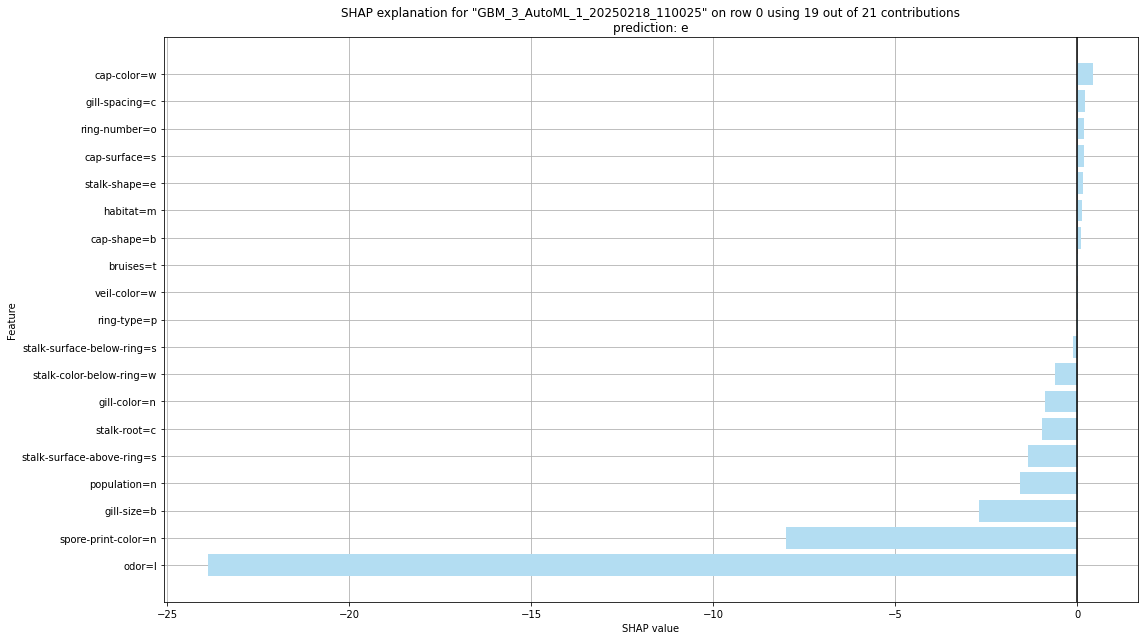

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_3_AutoML_1_20250218_110025,1,9.44469e-19,1,0,1.41148e-17,1.99228e-34,5633,0.294416,GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20250218_110025,1,0.000632275,1,0,0.000806416,6.50306e-07,586,0.228236,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20250218_110025,1,0.000517017,1,0,0.000517284,2.67583e-07,3425,1.49985,StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20250218_110025,1,0.0179516,1,0,0.0178049,0.000317014,1865,0.12669,StackedEnsemble
DeepLearning_grid_1_AutoML_1_20250218_110025_model_5,1,0.000230327,1,0,0.00249234,6.21174e-06,644,0.03428,DeepLearning
GBM_grid_1_AutoML_1_20250218_110025_model_1,1,2.59729e-18,1,0,3.48009e-17,1.2111e-33,8729,0.334647,GBM
GBM_grid_1_AutoML_1_20250218_110025_model_2,1,5.95015e-18,1,0,3.63483e-17,1.3212e-33,4061,0.221191,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20250218_110025,1,0.000683073,1,0,0.000683427,4.67073e-07,871,0.249558,StackedEnsemble
GBM_grid_1_AutoML_1_20250218_110025_model_3,1,9.44469e-19,1,0,1.37384e-17,1.88743e-34,6504,0.296501,GBM
GBM_4_AutoML_1_20250218_110025,1,2.12505e-18,1,0,2.13572e-17,4.56128e-34,7381,0.169314,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_3_AutoML_1_20250218_110025

,e,p,Error,Rate
e,1202.0,0.0,0.0,(0.0/1202.0)
p,0.0,1149.0,0.0,(0.0/1149.0)
Total,1202.0,1149.0,0.0,(0.0/2351.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

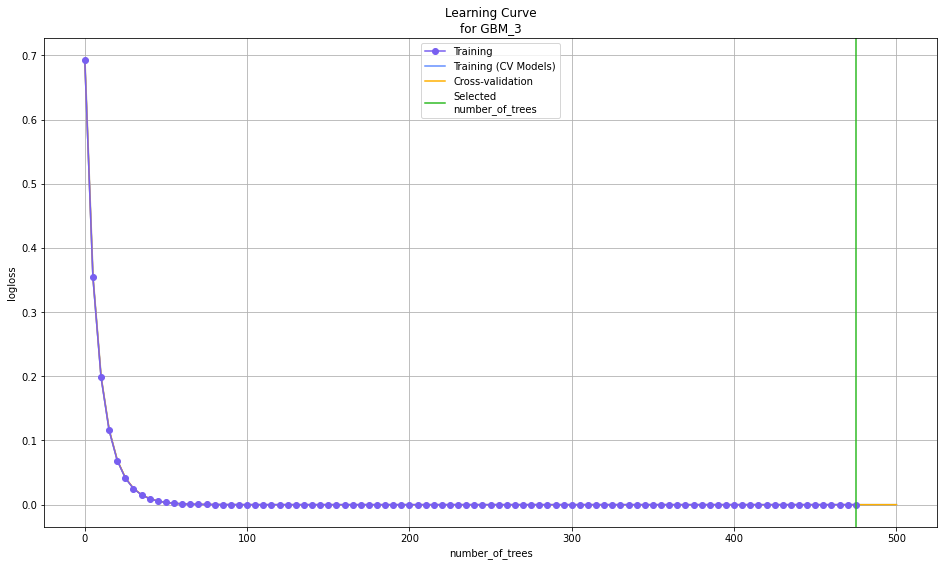

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

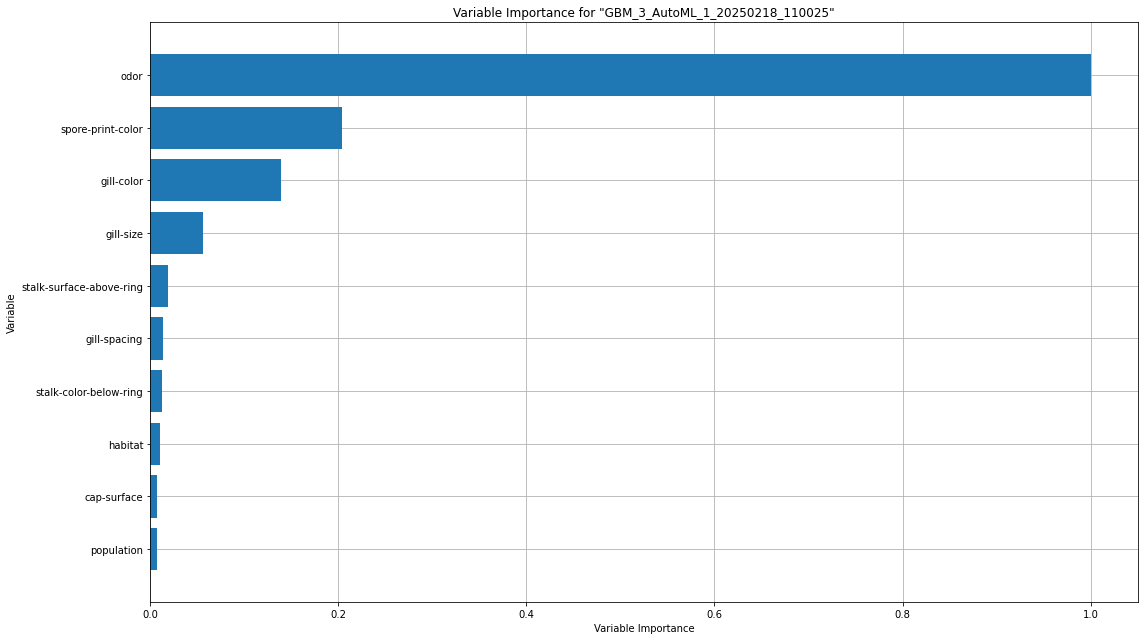

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

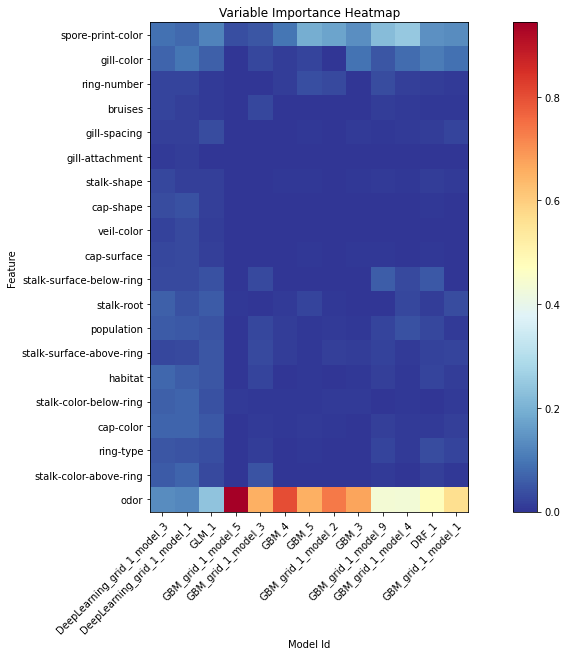

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

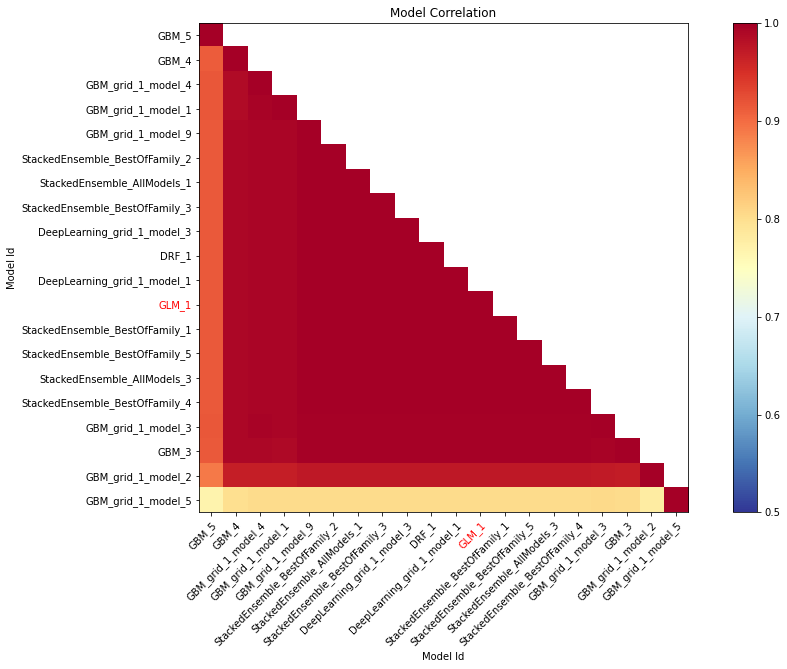

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

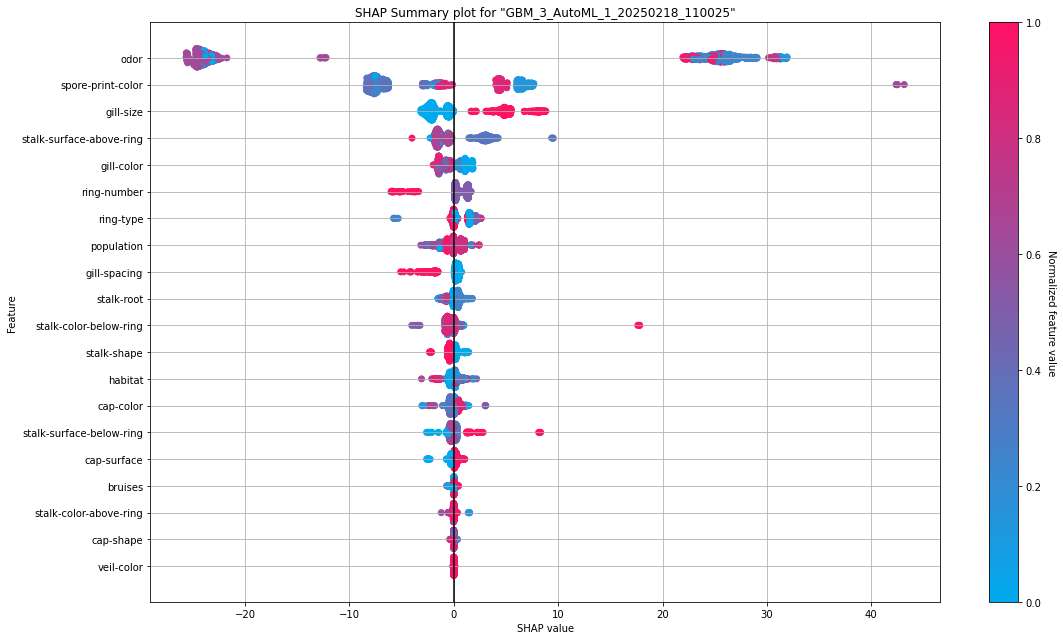

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

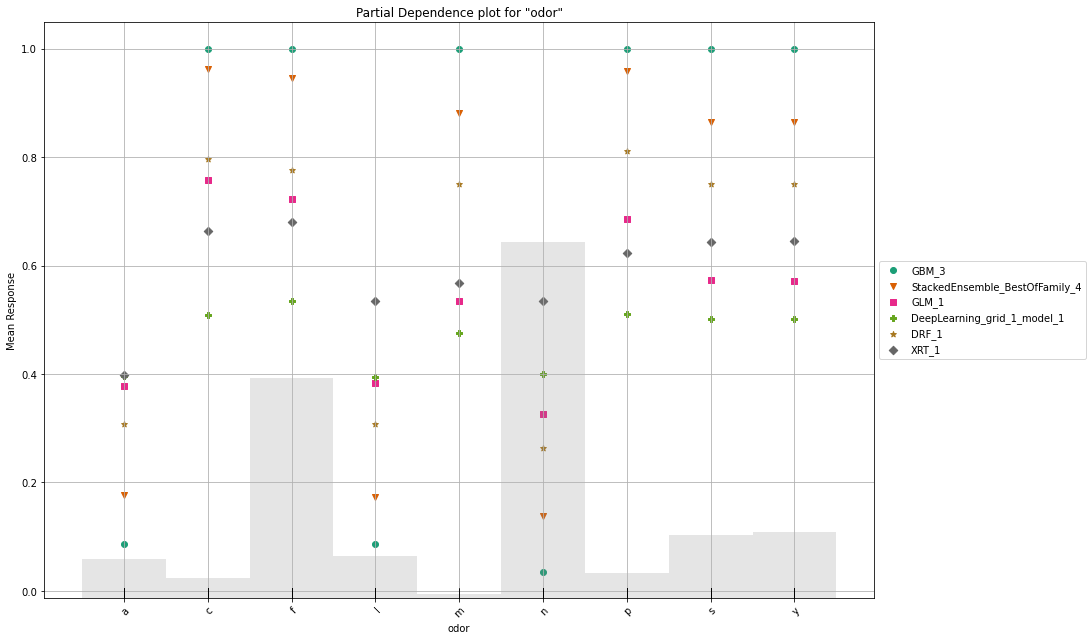

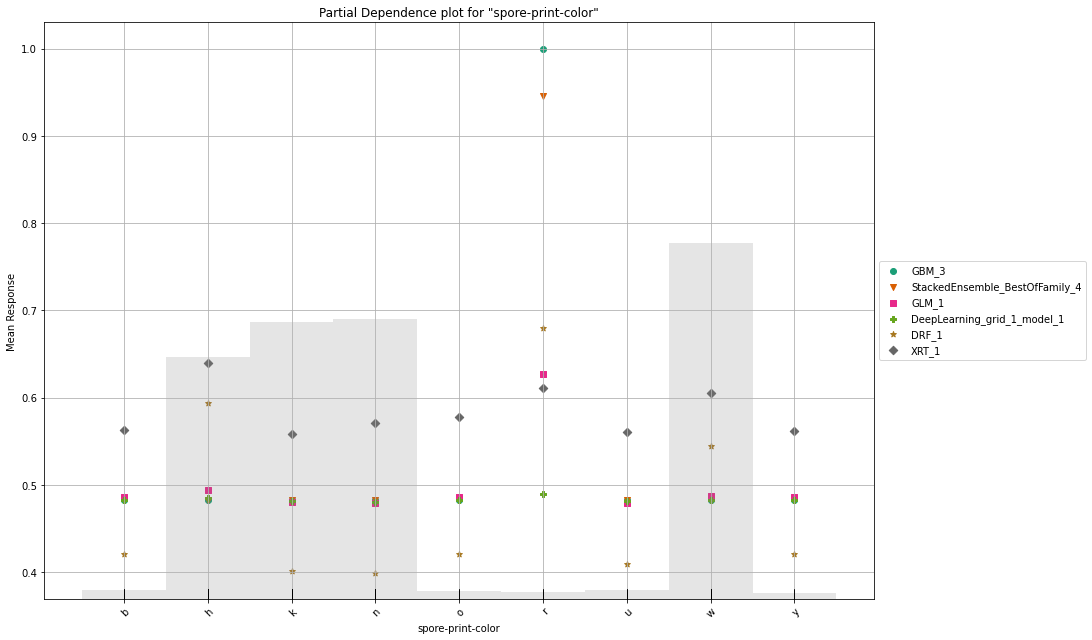

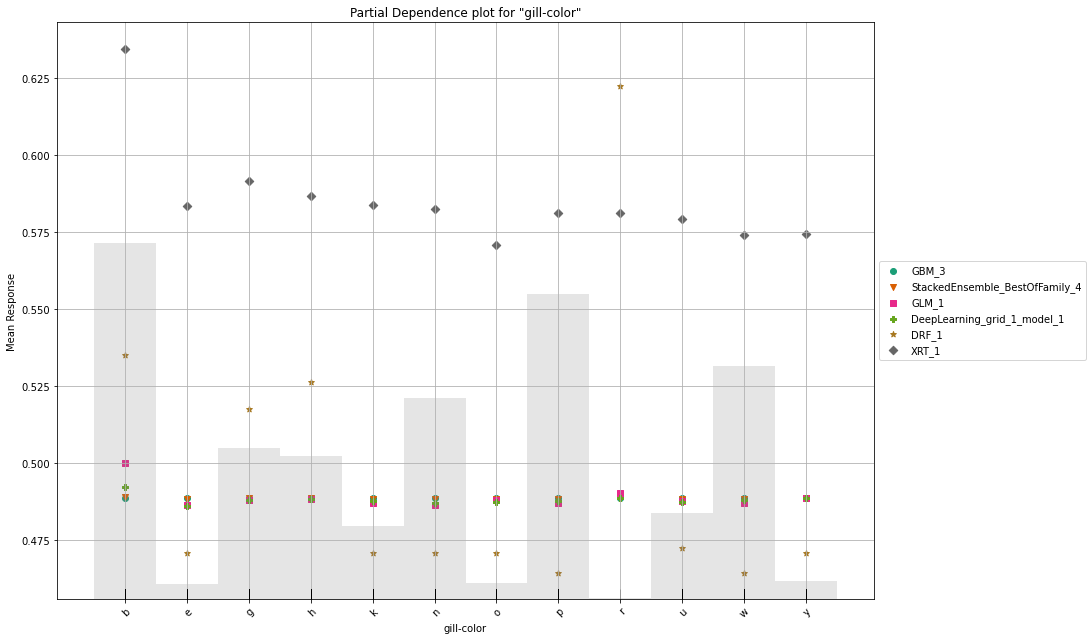

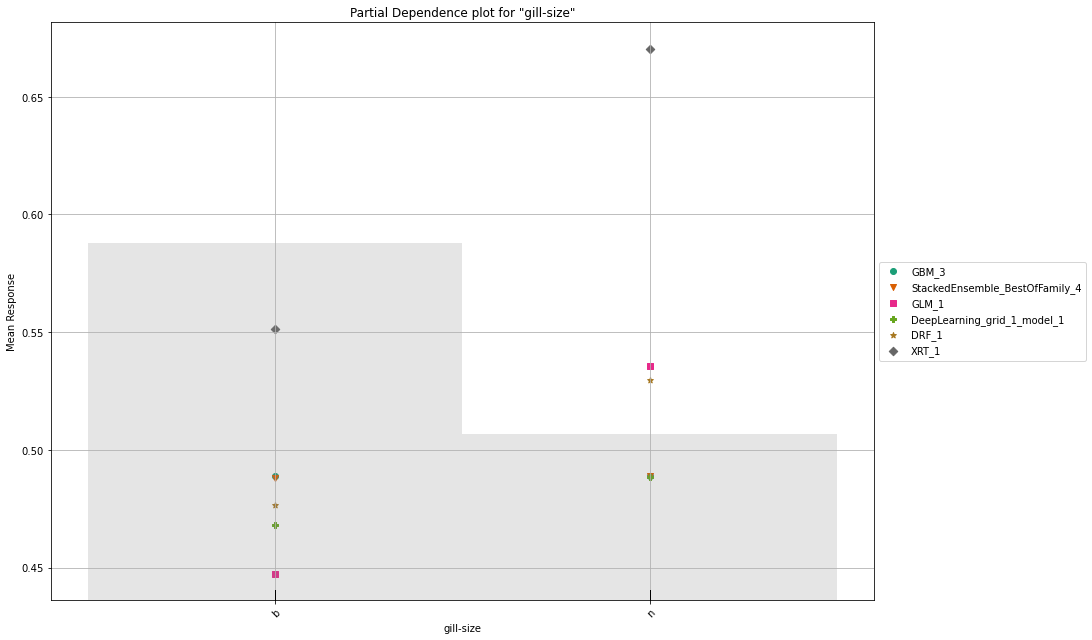

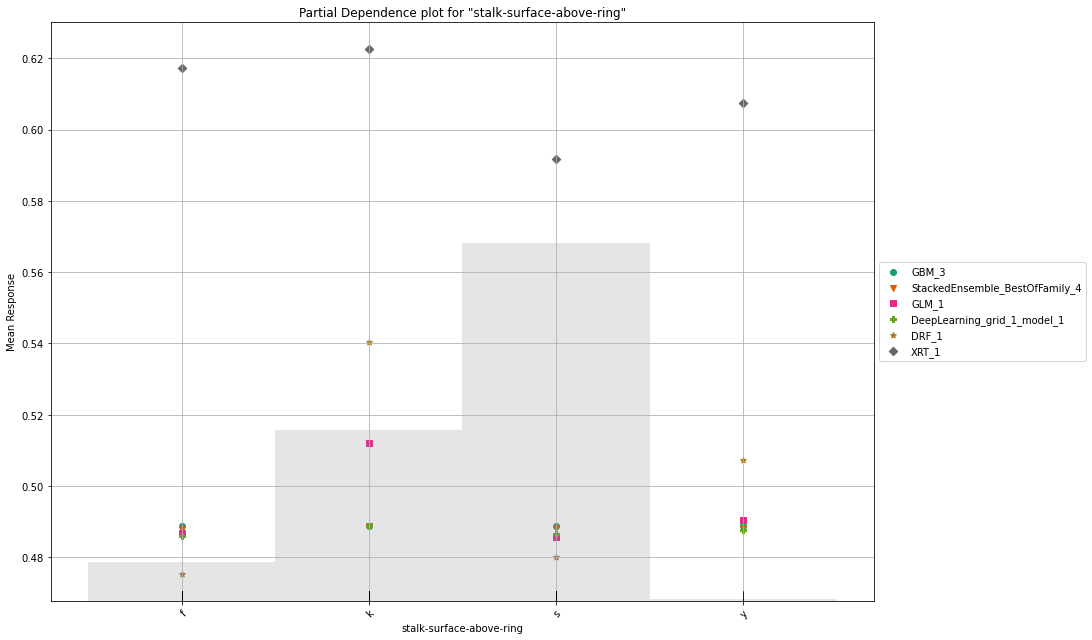

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_3_AutoML_1_20250218_110025,1,9.44469e-19,1,0,1.41148e-17,1.99228e-34,5633,0.294416,GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20250218_110025,1,0.000632275,1,0,0.000806416,6.50306e-07,586,0.228236,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20250218_110025,1,0.000517017,1,0,0.000517284,2.67583e-07,3425,1.49985,StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20250218_110025,1,0.0179516,1,0,0.0178049,0.000317014,1865,0.12669,StackedEnsemble
DeepLearning_grid_1_AutoML_1_20250218_110025_model_5,1,0.000230327,1,0,0.00249234,6.21174e-06,644,0.03428,DeepLearning
GBM_grid_1_AutoML_1_20250218_110025_model_1,1,2.59729e-18,1,0,3.48009e-17,1.2111e-33,8729,0.334647,GBM
GBM_grid_1_AutoML_1_20250218_110025_model_2,1,5.95015e-18,1,0,3.63483e-17,1.3212e-33,4061,0.221191,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20250218_110025,1,0.000683073,1,0,0.000683427,4.67073e-07,871,0.249558,StackedEnsemble
GBM_grid_1_AutoML_1_20250218_110025_model_3,1,9.44469e-19,1,0,1.37384e-17,1.88743e-34,6504,0.296501,GBM
GBM_4_AutoML_1_20250218_110025,1,2.12505e-18,1,0,2.13572e-17,4.56128e-34,7381,0.169314,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_3_AutoML_1_20250218_110025

,e,p,Error,Rate
e,1202.0,0.0,0.0,(0.0/1202.0)
p,0.0,1149.0,0.0,(0.0/1149.0)
Total,1202.0,1149.0,0.0,(0.0/2351.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

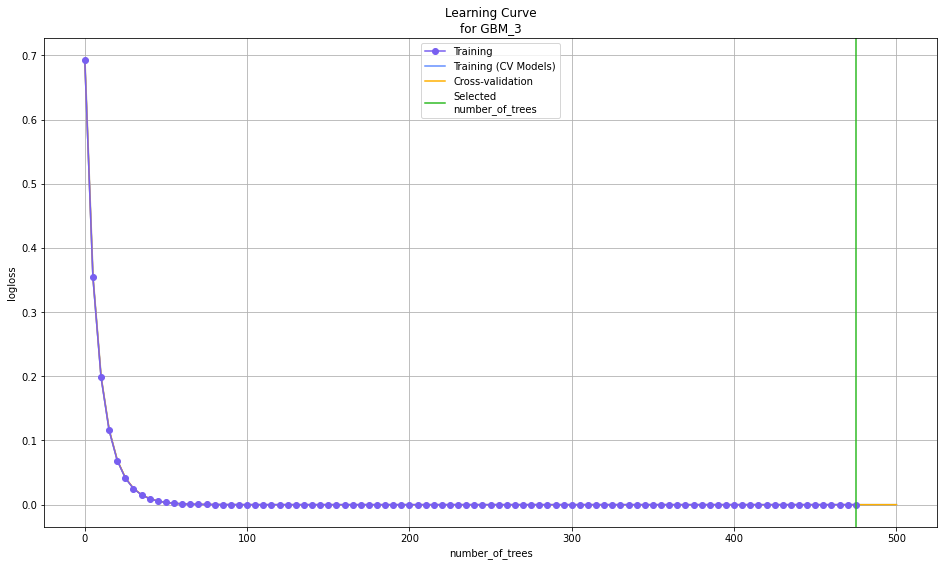

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

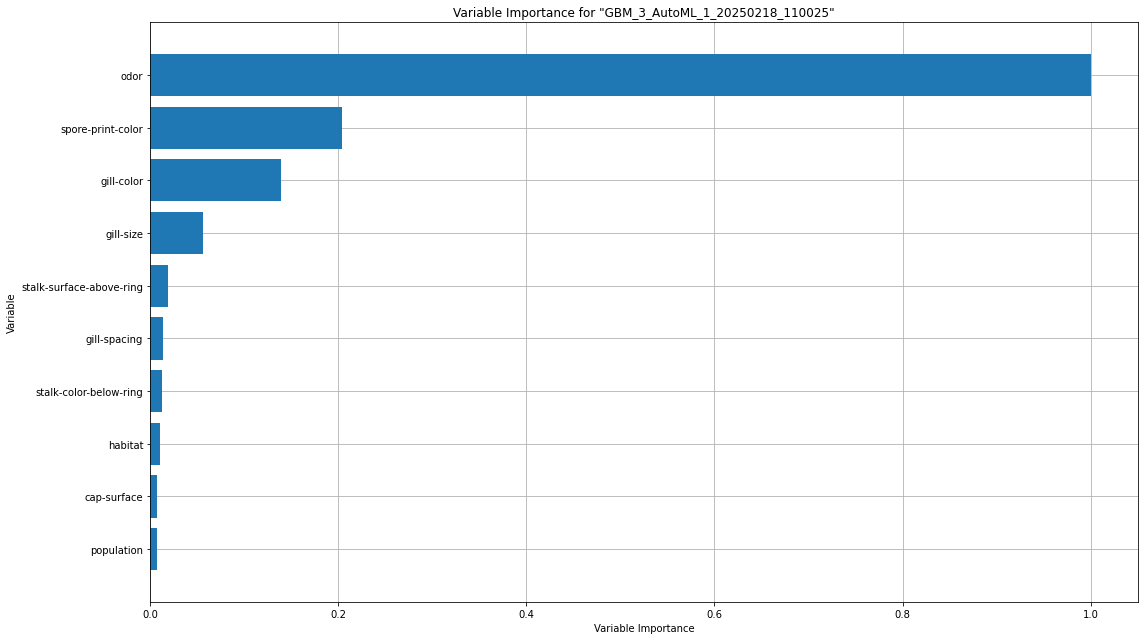

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

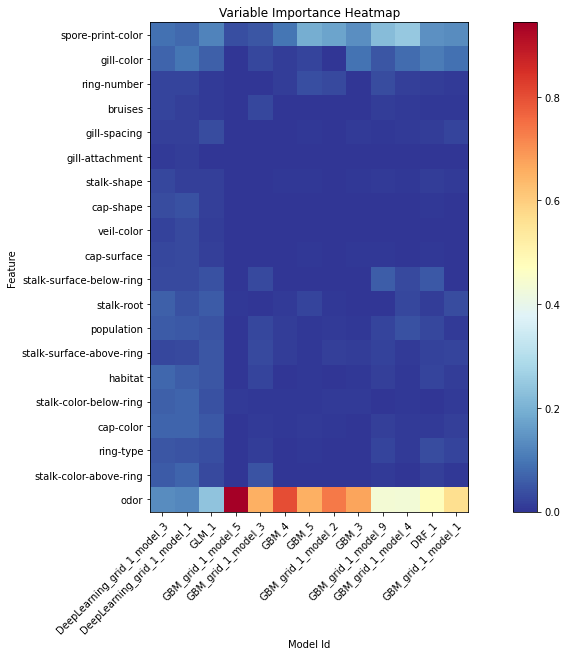

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

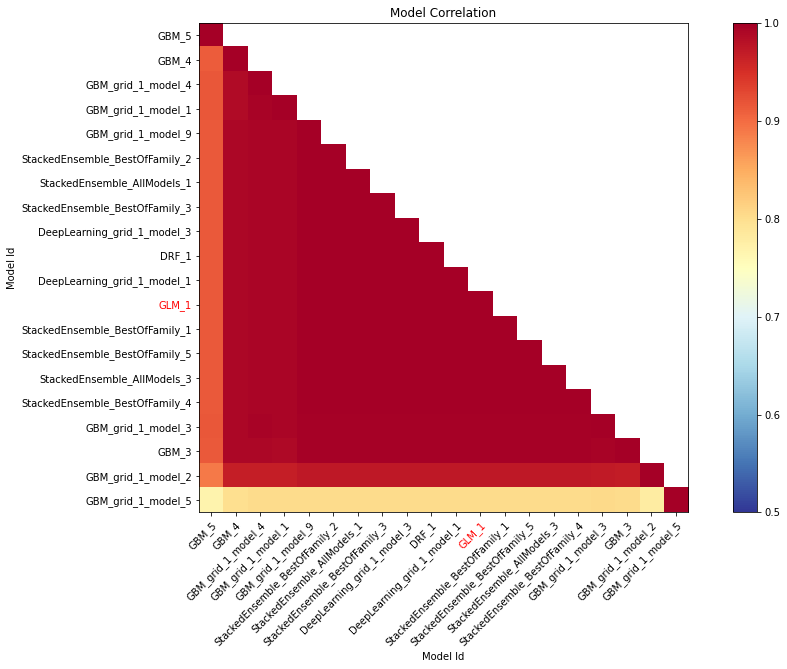

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

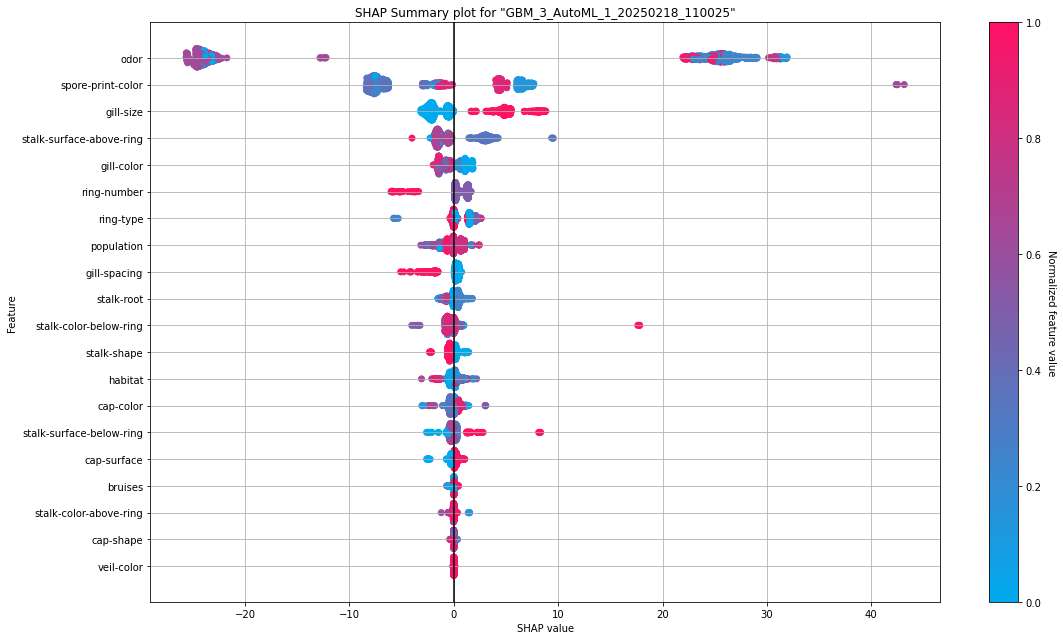

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

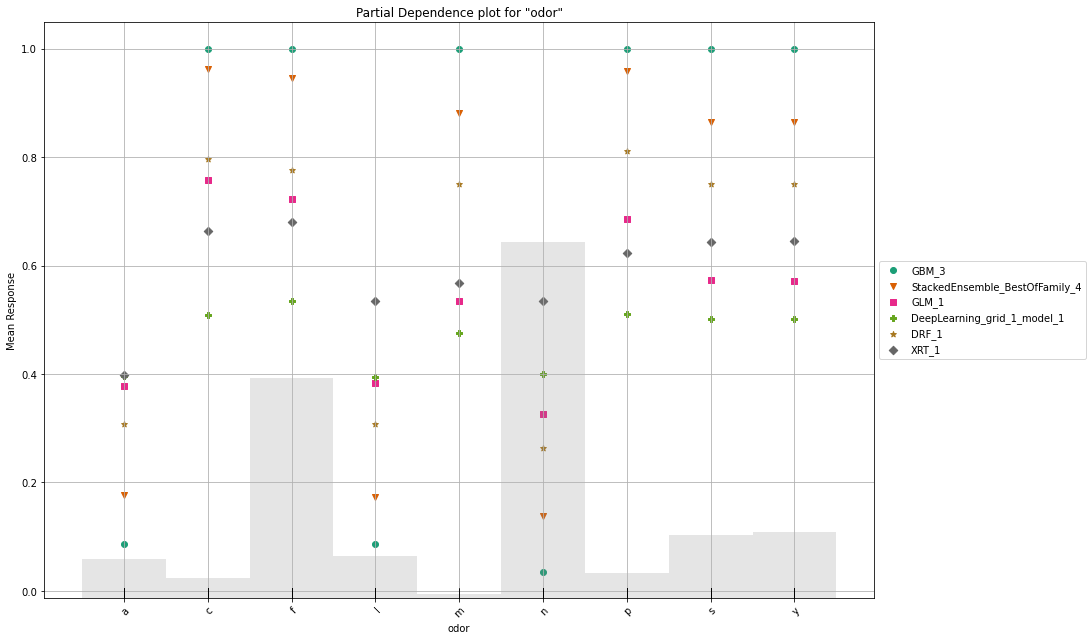

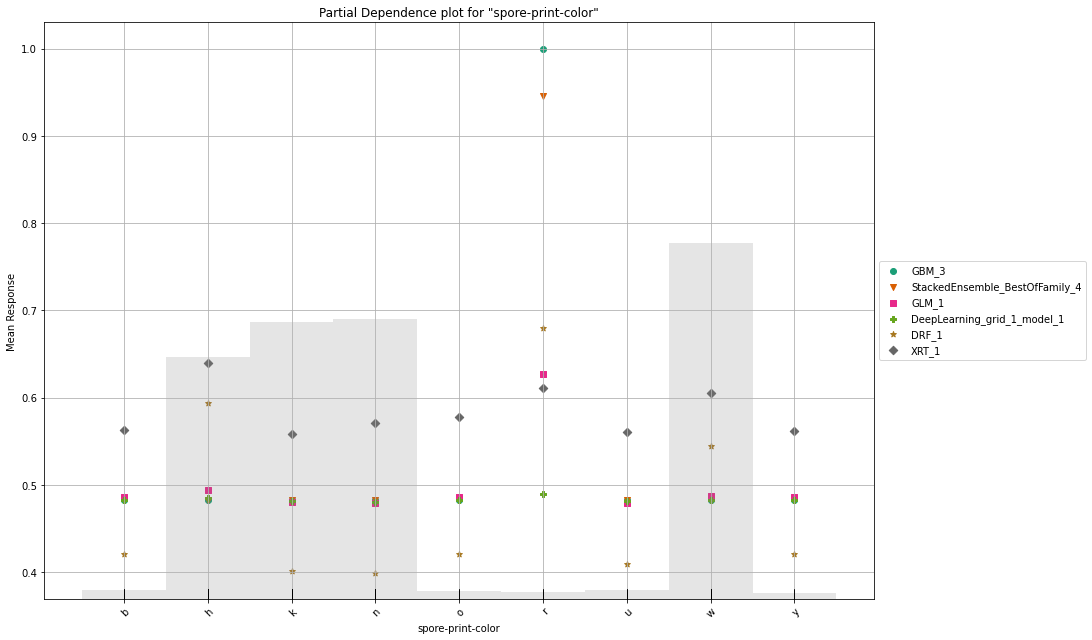

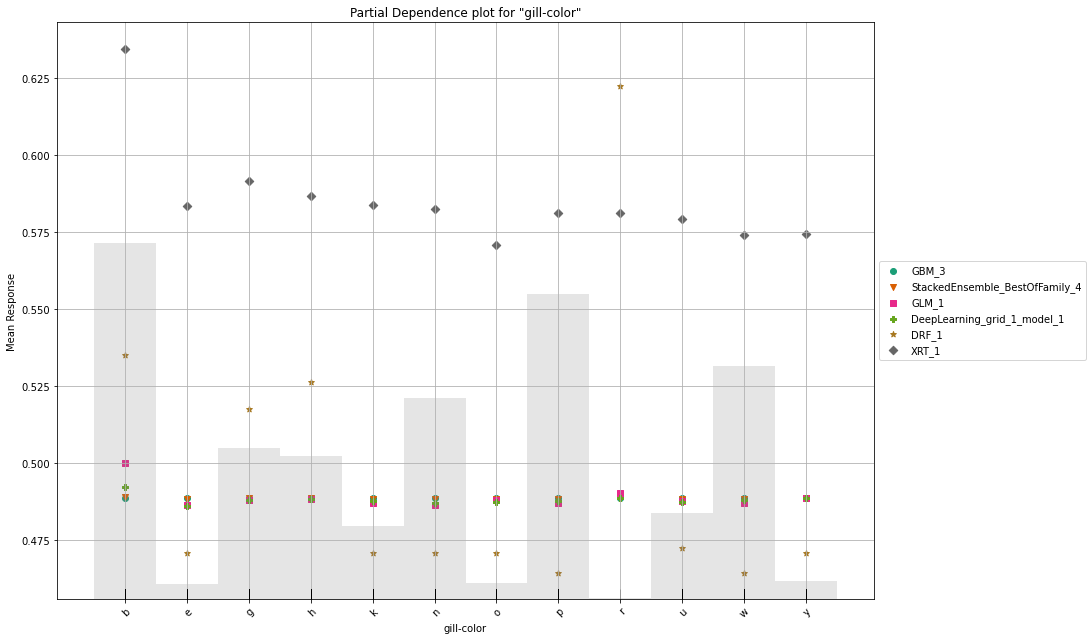

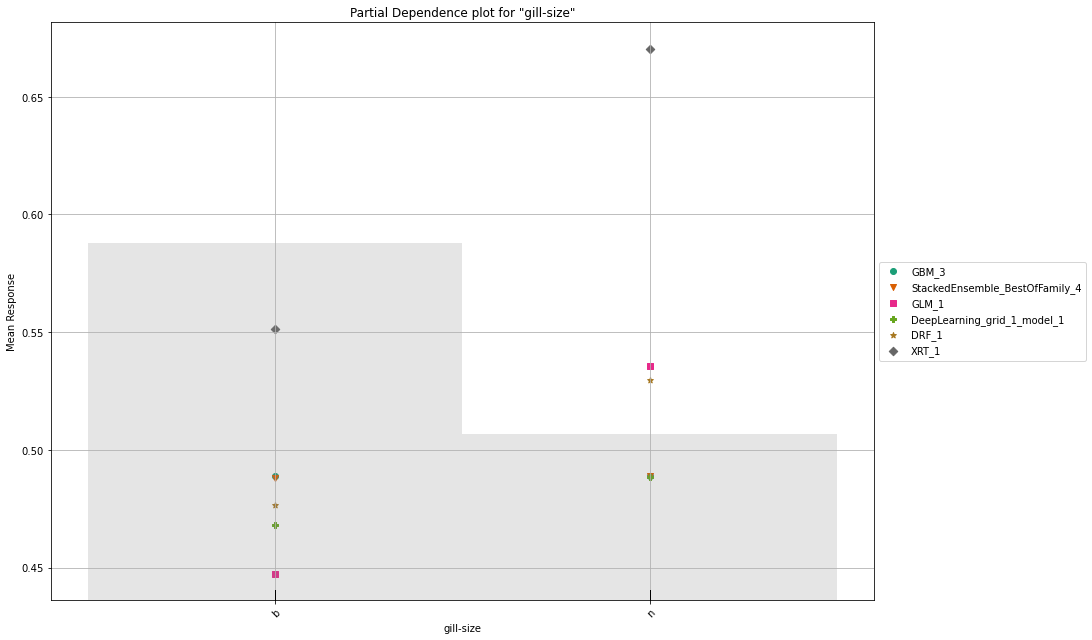

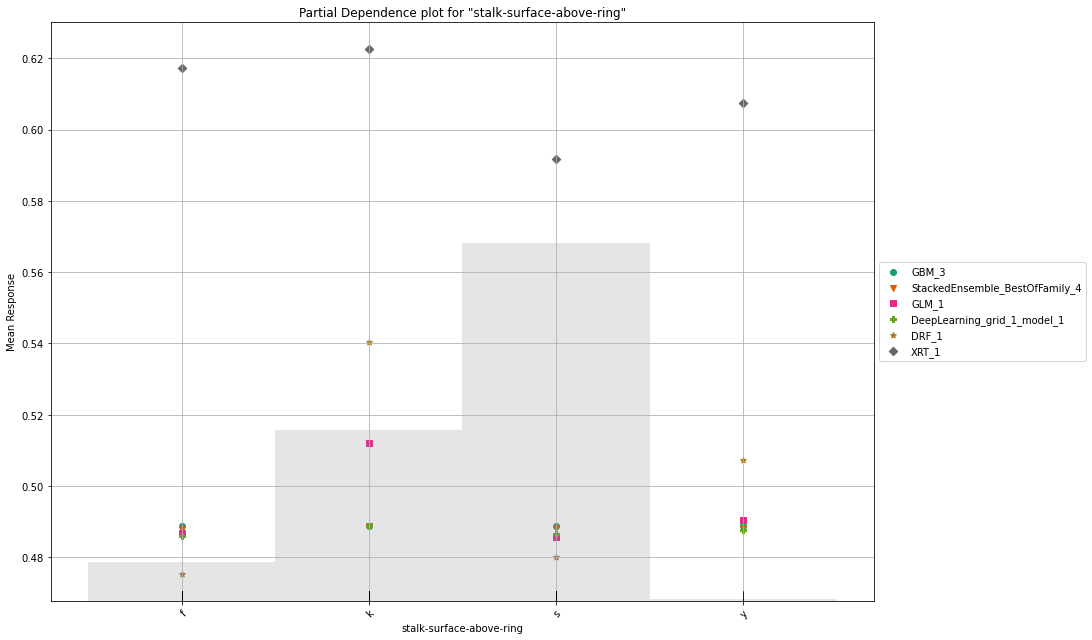

In [7]:
aml_model.explain_row(test_df, row_index=0)
aml_model.explain(test_df)